# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset is about No show appointments taken from kaggle which shows data of more than 110,000 patients which I think is a good big number to analyze, and it shows many different features of people who either showed at the appointment time or not.

Based on this dataset, I will try to find out which factor basically affect the probability of showing in appointment, some of them may have positive relationship or negative one, some of them may not have a relationship, we will explore this through the following steps


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

***Overview of the dataset***

**General information:**
I start analysing the data present to see if there are some missing data or not, I could easily see that there is no missing data of any column \
From describe method, we find out that some data are not logical such as the minimum age is a negative number, so we need to eliminate it later, we can also the average age and other data clear \
we can also find out that there is no duplicated data \
we can check to find that all data were collected in 2016 and from 81 neighbourhoods which would make a weight in analyzing the data given \
comparing Appointment day to schedueled day, we find out that in Appointment day column, only day is shown while time in format of hh:mm:ss is the same for all data whch should be neglected

**Handicap data:** it shows that max value is 4, while I think it is expected to be on a scale from 0 to 1, similar to other data columns, since it is True or False, so we would convert any value higher than 0 to be 1

In [3]:
#Loading Data
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.shape
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#finding out null values
data.info()
print('There is {} rows missing from the data set'.format(data.isnull().any().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
There is 0 rows missing from the data set


In [5]:
#knowing df types
data_types = [type(data['Gender'][0]),type(data['ScheduledDay'][0]),type(data['AppointmentDay'][0]),
              type(data['Neighbourhood'][0]),type(data['No-show'][0])]
data_types

[str, str, str, str, str]

In [6]:
#statistical describtion
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#looking if there is any duplicated data
data.duplicated().sum()

0

In [8]:
#finding out no. of Neghbourhoods so if it would be a weighting factor or not
data['Neighbourhood'].nunique()

81

In [9]:
#to find out if this survey was taken in 2016 or in many years
data['AppointmentDay'].str.contains('2016').sum()

110527

In [10]:
#to find out if the HH:MM:SS is shown correctly in Appointment day or not since it always shows 00:00:00
data['AppointmentDay'].nunique(), data['ScheduledDay'].nunique()

(27, 103549)

In [11]:
#finding out how many people showed and how many did not show
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64


### Data Cleaning (Optimizing the data set!)

***Data Cleaninng*** 

**Unnecessary data:** we can see that patient ID and Appointment ID are not necessary so we would drop them from our dataset

**date time:** we need to convert the dates from a string to datetime format so we can modify and look up through it, and then we check out the type of date column to make sure it is date type now 

Now we want to calculate delta time (Duration) between the scheduled date and the appointment date which is the delay_time, and will be used later to see if it affects the patient NO SHOW

**Age issue:** we first drop data of ages < 0 since it is only one row and can be dropped not affecting the dataset, we can also find out that there are many cases where the age is zero, which is accepted since it is showing integer years age, so it would mean babies at age of less than 6 months

**Handcap:** we should fix the problem of values higher than 1, we should not drop them since they are a lot almost 400 rows, so we assume them to be 1

**Statistical Describe:** we find out that some data need to be fixed more since delay time is negative in 5 rows which means data entered by mistake, Those data would be dropped when and only when exploring the relationship between delay duration and NO SHOW response.\
Further NOTE: (All those persons did not show on time) so I think this happened due to wrong data entry so we should drop those 5 rows from our dataset

**No Show converted to 1 and 0:** to be easily used to find the average and mean, but the new column is (Show) so 1 means show and 0 means no-show

**Ill data:** we added it to mention if the patient has any history of diseases

**Checking our dataset size:** we now find out that we totally dropped 6 rows and added a new column

In [12]:
#dropping unnecessary data
data.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [13]:
#change string into datetime
#we calculate the delay time between scheduling and appointment day
data['AppointmentDay'] = data['AppointmentDay'].str[:10].apply(pd.to_datetime)
data['ScheduledDay'] = data['ScheduledDay'].str[:10].apply(pd.to_datetime)
data['Delay_time'] = data['AppointmentDay'] - data['ScheduledDay']
data['Delay_time'] = data['Delay_time'].astype(str)
#we only calculate the difference in days, ignoring hours and minutes
data['Delay_time'] = data['Delay_time'].apply(lambda x: x.split(" ")[0])
data['Delay_time'] = data['Delay_time'].astype(int)

In [14]:
data.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
Delay_time                 int32
dtype: object

In [15]:
#for babies less than 6 months, their age would be zero in years when converted to integer (Rounding up)
data = data[data['Age']>=0]

In [16]:
#since it is T or F question, we converted all other results >1 to be 1 since they are many rows
#then check the dataset again
#then I use describe to make sure the max value is 1
data['Handcap'].values[data['Handcap'].values>1] = 1

In [17]:
#Appointment day can't be earlier than scheduledday so
Wrong_data_entry = data['Delay_time']<0
Wrong_data_entry.sum()
#since they are only 5 rows out of 100,000 rows, we can ignore them since they all also have same
#feature of not shoiwng to an appointment, which makes it sound misleading
#We use describe then to make sure that all data are consistent
data = data[data['Delay_time']>=0]
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Delay_time
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,10.184345
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,15.255153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [18]:
#we added this column to be used in visualiziation and exploring data
#no show is 0, show is 1
data['Show'] = np.where(data['No-show'] == 'No', 1,0)

In [19]:
#we added this column which indicates if the patient has history with any kind of these diseases or not
ill = (data['Hipertension'] ==1) | (data['Diabetes'] ==1) | (data['Alcoholism'] ==1) | (data['Handcap'] ==1)
data['illness'] = np.where(ill,1,0)

In [20]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Delay_time,Show,illness
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1,1


In [21]:
#we see here that we removed total of 6 rows and added 3 columns
data.shape

(110521, 15)

<a id='eda'></a>
## Exploratory Data Analysis

**Histogram**:
which shows the percentage of all data as overall

**Pie Chart:**
which shows the percentage of people who No-showed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163C42E8588>,
      dtype=object)

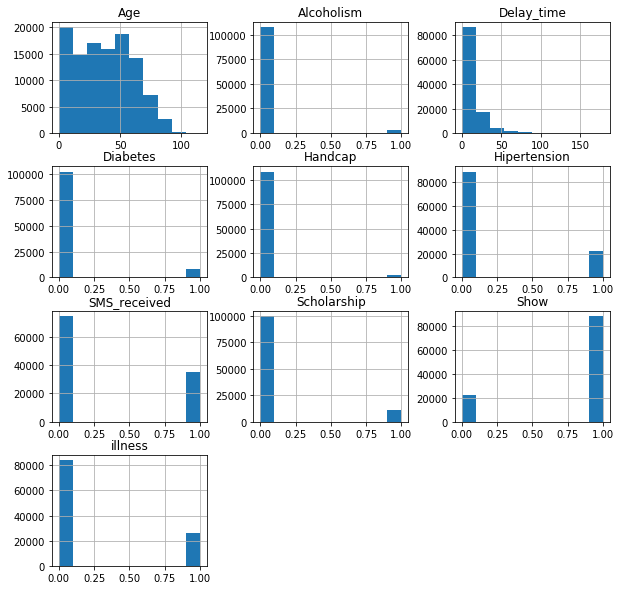

In [22]:
#to show an overall histogram matrix of all data present
data.hist(figsize = (10,10))

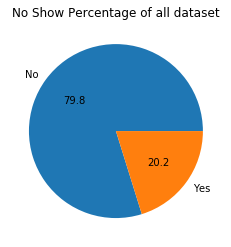

In [34]:
#Pie chart to show how many people have not showed at time
data['No-show'].value_counts()
Total_show = data['No-show'].value_counts()
plt.pie(Total_show,labels = ['No','Yes'],autopct='%.1f')
plt.title('No Show Percentage of all dataset');

### Research Question 1 (Is there a correlation between Gender and No-Show?)

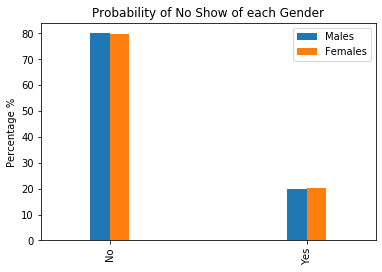

In [35]:
#we make masks for both males and females
Males = data['Gender'] == 'M'
Females = data['Gender'] == 'F'

#count number of males and females, we found out that females are double the males number
Males.value_counts()

#make masks for percentage of No-show for both Males and Females
Males_no_show_mask = (data['No-show'][Males].value_counts()*100)/data['No-show'][Males].value_counts().sum()
Females_no_show_mask = (data['No-show'][Females].value_counts()*100)/data['No-show'][Females].value_counts().sum()
No_show_Gender = pd.DataFrame({'Males':Males_no_show_mask,'Females':Females_no_show_mask})

#plot the masks
No_show_Gender.plot(kind='bar',width=0.2)
plt.legend()
plt.ylabel('Percentage %');
plt.title("Probability of No Show of each Gender");

**Findings:** \
We find out that Females appointments are double the number of Males appointments so we can not compare both to each other (70,000 Females and 35,000 Males), instead we would use the perecentage of No show of each gender and the results were shown in the chart 

Results show that almost the same percentage of eacgh gender did not show (22%)

**Conclusion:** \
We now conclude the Gender does not have a correlation to No show data

### Research Question 2  (Does some neighbourhoods have high or low No-Show?)

In [36]:
#we group the data by neighbourhood to see if it affects shoiwng or not and find statistics of it
data.groupby('Neighbourhood')['Show'].mean().describe()
#we find the mean is 0.795
#discover the neighbourhoods which showed zero and 100 percent showing
Show_Neighbourhood = data.groupby('Neighbourhood')['Show'].mean().reset_index()
Show_Neighbourhood
#Neighbourhoods with few samples
(data['Neighbourhood'].value_counts()<100).sum()

7

In [37]:
#Abnormal show data of Neighbourhoods
N_zero = Show_Neighbourhood[Show_Neighbourhood['Show']==1] 
N_full = Show_Neighbourhood[Show_Neighbourhood['Show']==0]
Show_Neighbourhood_deviations = N_zero.append(N_full)
Show_Neighbourhood_deviations['No. of samples'] =[(data['Neighbourhood'] == 'PARQUE INDUSTRIAL').sum(),
                                                  (data['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE').sum()]
Show_Neighbourhood_deviations

,Neighbourhood,Show,No. of samples
51,PARQUE INDUSTRIAL,1.0,1
34,ILHAS OCEÂNICAS DE TRINDADE,0.0,2


**Findings:** 

We find out that the mean of attendance is around 80% of each neighbourhood with some exceptions \
Exceptions We found out are one Neighbourhood with 100% showing and one Neigbourhood with 0% showing, which when explored more; we found out that we only have one and two samples of each neighbourhood, which means we can not correlate attendance to those neighbourhoods \

When we discovered number of samples obtained from each Neighbourhood, we found out that there are 7 neighbourhoods with less than 100 samples, which are limitation of the dataset that we need more samples of those neghbourhoods to correlate to them

**Conclusion:** \
The neighbourhood section has limitations of few samples of some neigbourhoods

### Research Question 3  (Is there a correlation between Age and No Show?)

In [38]:
#Making Age Masks
kids = data['Age'] <= 10
Teenagers = (data['Age'] >10) & (data['Age'] <=20)
Young = (data['Age'] >20) & (data['Age'] <=30) 
Middle_Age = (data['Age'] >30) & (data['Age'] <=45)
Old = (data['Age'] >45) & (data['Age'] <=70)
Very_old = data['Age'] >70
Mask = [kids, Teenagers, Young, Middle_Age, Old, Very_old]

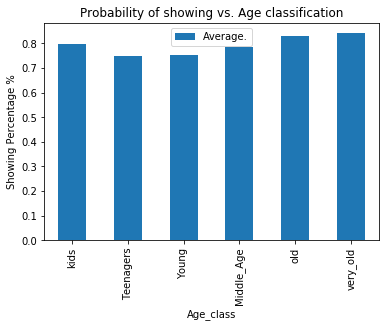

In [39]:
#Making a dataframe including means for each mask
df=[]
for i in Mask:
    df.append(data[i]['Show'].mean())
df
Age_df= pd.DataFrame(df)
Age_class = pd.DataFrame({'Age':['kids','Teenagers','Young','Middle_Age','old','very_old']})
#joining 2 dataframes together
Age_Show = Age_class.join(Age_df)
Age_Show.columns = ['Age_class','Average.']
Age_Show.plot('Age_class','Average.',kind='bar')
plt.ylabel("Showing Percentage %");
plt.title('Probability of showing vs. Age classification');

**Findings:** 

We can see that except for kids, the showing percentage increases as the age increases, with the highest show up for very old people.

It can also be clear that kids showing up is high due to the fact that their parents take them to the appointments, so it is affected by their parents ages who are usually above Middle age

**Conclusion:**

There is a positive relationship between age and shwoing up

### Research Question 4  (Is there a correlation between Delay time and No Show?)

In [40]:
#Delay time masks
short_period = data.Delay_time <= 7
normal_period = (data.Delay_time >7)&(data.Delay_time <= 14)
long_period = (data.Delay_time >14)&(data.Delay_time <= 28)
very_long_period = (data.Delay_time >28)
Delay_mask = [short_period,normal_period,long_period,very_long_period]

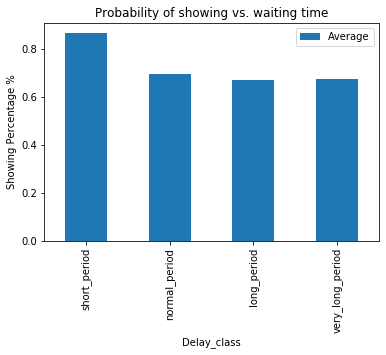

In [41]:
#Making a dataframe including means for each mask
df=[]
for i in Delay_mask:
    df.append(data[i]['Show'].mean())
df
delay_df= pd.DataFrame(df)
Delay_class = pd.DataFrame({'Delay':['short_period','normal_period','long_period','very_long_period']})
#joining 2 dataframes together
Delay_Show = Delay_class.join(delay_df)
Delay_Show.columns = ['Delay_class','Average']
Delay_Show.plot('Delay_class','Average',kind='bar')
plt.ylabel("Showing Percentage %");
plt.title("Probability of showing vs. waiting time");

**Findings:**

There are big variety of the number of days between appointment and the schedling Dates and it must have an effect on the No.Show

**Results:**

There is a negative relationship between delay time and the showing at appointment as shown in the plot \
Appointments within same week are most likely to be attended

### Research Question 5  (Is there a correlation between SMS messages and No Show?)

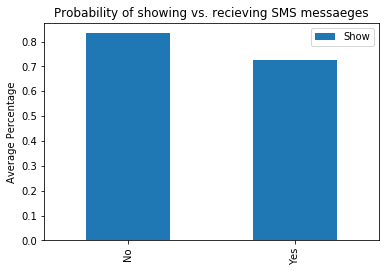

In [42]:
#making mask for People who SMS message
SMS_sent_mask_show = data['SMS_received'] == 1

SMS_show = data.groupby(SMS_sent_mask_show)['Show'].mean().reset_index()
ax = SMS_show.plot.bar()
ax.set_xticklabels(['No','Yes']);
plt.title("Probability of showing vs. recieving SMS messaeges");
plt.ylabel('Average Percentage');
plt.legend();

**Findings:** 
It has been shown that almost 33% of people have messages sent, and then we compared the possibility that someone has received a message would attend the appointment or not

**Conclusion:**
It has been seen that the average percentage of people who received the messages and attended is lower than those who did not attend, which makes no sense or it maybe mentions that the message is written in a not professional way or containing wrong informations

### Research Question 6  (Is there a correlation between Scholarship and No Show?)

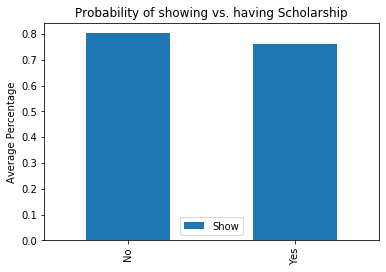

In [45]:
#making mask for People who got a scholarship
Scholarship = data['Scholarship'] == 1

Scholarship_show = data.groupby(Scholarship)['Show'].mean().reset_index()
ax = Scholarship_show.plot.bar()
ax.set_xticklabels(['No','Yes']);
plt.title("Probability of showing vs. having Scholarship");
plt.ylabel('Average Percentage');
plt.legend();

**Findings:** 
It has been shown that almost 10% of people have scholarships, and then we compared the possibility that someone has a scholarship would attend the appointment or not

**Conclusion:**
It has been seen that the average percentage of people who have a scholarship and attended is lower than those who did not attend, which makes sense that they are busier 

### Research Question 7  (Is there a correlation between illness history and No Show?)

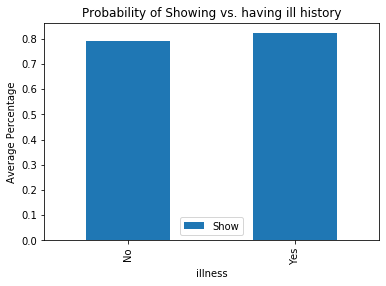

In [44]:
#Making mask for people who had illness history
ill_data = data[['illness','Show']]
ill_show = ill_data.groupby('illness')['Show'].mean().reset_index()
ax=ill_show.plot('illness','Show',kind='bar')
ax.set_xticklabels(['No','Yes']);
plt.title("Probability of Showing vs. having ill history");
plt.ylabel('Average Percentage');
plt.legend();

**Findings:** 
It has been shown that almost 25% of people have illness history, and then we compared the possibility that someone has history with illness would attend the appointment or not

**Conclusion:**
It has been seen that the average percentage of people who have illness history and attended is higher than those who did not attend, which makes sense that they are more careful about their health 

<a id='conclusions'></a>
## Conclusions

***Conclusion:***

*it is obvious that there is a positive relatonship between age classification and showing, As age classification increases, the probability to show up increases
On the other hand, the mean age of cases is 37 years old

*it is obvious that there is a direct relationship between illness history and attending the appointment, If the patient has a previous illness history; the probability to attend and show up is higher

*it is obvious that there is a negative relationship between the duration between scheduling and attending the appointment, As the duration increases; the probability to attend and show up is lower

*it is obvious that there is a negative relationship between having scholarship and attending the appointment, If the patient has a scholarship; the probability to attend and show up is lower

*it is obvious that there is no correlation between the Gender and probability of showing up since both Males and Females have similar probabilities

***Limitations:***

*There are some data that has negative values of age, which is not logical

*There are some data of handcap having values >1, which indicates a wrong data entry

*There are some data that has appointment date prior to scheduleddate, which is not logical as well

*There is not enough sample data from some neighbourhoods, which did not help us to find a correlation between the probability of showing up and the neighbourhood

*Samples of people having Alcoholism, Diabetes, handcap, or scholarship are few compared to others who don't have, which may make this visualization not 100% precise since we would need more samples including higher percentage of them in each dataset.

***Statistical Data:***

*Histograms shows that the total percentage of showing up was around 80%

*Histograms shows the distribution of patients age, mentioning that 75% of them were below 50 years old.